### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
tf.random.set_seed(42)

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


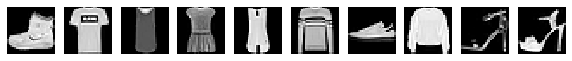

In [9]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [11]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 26us/sample - loss: 233.7262 - accuracy: 0.1228 - val_loss: 7658.1616 - val_accuracy: 0.2841
Epoch 2/50
60000/60000 [==============================] - 1s 9us/sample - loss: 7577.1504 - accuracy: 0.2860 - val_loss: 13597.7988 - val_accuracy: 0.3289
Epoch 3/50
60000/60000 [==============================] - 0s 6us/sample - loss: 13565.4033 - accuracy: 0.3320 - val_loss: 13604.6914 - val_accuracy: 0.2497
Epoch 4/50
60000/60000 [==============================] - 0s 7us/sample - loss: 13559.5645 - accuracy: 0.2504 - val_loss: 13506.5244 - val_accuracy: 0.2584
Epoch 5/50
60000/60000 [==============================] - 0s 8us/sample - loss: 13477.7344 - accuracy: 0.2549 - val_loss: 12677.6514 - val_accuracy: 0.3064
Epoch 6/50
60000/60000 [==============================] - 0s 7us/sample - loss: 12577.6045 - accuracy: 0.3085 - val_loss: 8492.7793 - val_accuracy: 0.2189
Epoch 7/50
60000/6

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [13]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/sample - loss: 3.2483 - accuracy: 0.0811 - val_loss: 30.4160 - val_accuracy: 0.1037
Epoch 2/50
60000/60000 [==============================] - 1s 17us/sample - loss: 2.9163 - accuracy: 0.1081 - val_loss: 16.3628 - val_accuracy: 0.1220
Epoch 3/50
60000/60000 [==============================] - 1s 15us/sample - loss: 2.6447 - accuracy: 0.1383 - val_loss: 10.4811 - val_accuracy: 0.1515
Epoch 4/50
60000/60000 [==============================] - 1s 15us/sample - loss: 2.4196 - accuracy: 0.1724 - val_loss: 7.5213 - val_accuracy: 0.1909
Epoch 5/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.2317 - accuracy: 0.2101 - val_loss: 5.9218 - val_accuracy: 0.2319
Epoch 6/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.0744 - accuracy: 0.2491 - val_loss: 4.9738 - val_accuracy: 0.2648
Epoch 7/50
60000/60000 [=============================

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.001)

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/sample - loss: 3.0347 - accuracy: 0.0658 - val_loss: 19.2231 - val_accuracy: 0.1200
Epoch 2/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.7339 - accuracy: 0.1050 - val_loss: 12.0361 - val_accuracy: 0.1664
Epoch 3/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.4896 - accuracy: 0.1584 - val_loss: 9.0229 - val_accuracy: 0.1905
Epoch 4/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.2900 - accuracy: 0.2185 - val_loss: 7.2766 - val_accuracy: 0.2126
Epoch 5/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.1259 - accuracy: 0.2727 - val_loss: 6.1038 - val_accuracy: 0.2358
Epoch 6/50
60000/60000 [==============================] - 1s 14us/sample - loss: 1.9901 - accuracy: 0.3152 - val_loss: 5.2585 - val_accuracy: 0.2594
Epoch 7/50
60000/60000 [==============================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Hidden layers
model.add(tf.keras.layers.Dense(100, activation='sigmoid', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid', name='Layer_2'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid', name='Layer_3'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

sgd = tf.keras.optimizers.SGD(lr=0.03)

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
Layer_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 102,846
Trainable params: 101,278
Non-trainable params: 1,568
____________________________________________

### Run the model

In [18]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 121us/sample - loss: 2.2258 - accuracy: 0.2729 - val_loss: 2.0583 - val_accuracy: 0.4269
Epoch 2/30
60000/60000 [==============================] - 7s 117us/sample - loss: 1.7415 - accuracy: 0.4845 - val_loss: 1.4570 - val_accuracy: 0.5495
Epoch 3/30
60000/60000 [==============================] - 7s 120us/sample - loss: 1.2782 - accuracy: 0.6097 - val_loss: 1.1065 - val_accuracy: 0.6735
Epoch 4/30
60000/60000 [==============================] - 7s 120us/sample - loss: 1.0069 - accuracy: 0.6898 - val_loss: 0.8804 - val_accuracy: 0.7223
Epoch 5/30
60000/60000 [==============================] - 7s 119us/sample - loss: 0.8238 - accuracy: 0.7266 - val_loss: 0.7427 - val_accuracy: 0.7459
Epoch 6/30
60000/60000 [==============================] - 7s 125us/sample - loss: 0.7180 - accuracy: 0.7458 - val_loss: 0.6671 - val_accuracy: 0.7571
Epoch 7/30
60000/60000 [==========================